In [1]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package basque_grammars is alread

True

In [2]:
texts = []

for i in range(1,30):
    with open(f'../dados/generated_example/{i}.txt', 'r') as file:
        texts.append(file.read())

texts

['- I’ve been feeling really overwhelmed with my workload lately. I can’t seem to catch a break.\n- It sounds like you’re feeling a lot of stress and pressure from all the responsibilities on your plate. \n- Yes, exactly. It feels like I’m drowning in work.\n- Have you tried setting some boundaries or asking for help to lighten the load?\n- I have, but it feels like there’s just too much to do.\n- It must be really tough to feel like you’re constantly juggling multiple tasks without a break.\n- It really is. I feel like I’m on the verge of burning out.\n- It’s important to prioritize your well-being and take breaks when needed to avoid burnout.\n- I know, I just struggle with feeling like I need to do everything perfectly.\n- Perfectionism can definitely add to the pressure you’re feeling. It’s okay to give yourself permission to not always be perfect.\n- Thank you for saying that. I sometimes forget that it’s okay to not be perfect.\n- It’s a common struggle, but remember that your he

In [3]:
processed_texts = []
for text in texts:
    split_text = text.split('===')[0].strip().split('\n')

    # Extracting alternating messages
    intrigue_messages = split_text[::2]
    peacemaker_messages = split_text[1::2]

    # Creating schema
    result = []
    for i in range(len(intrigue_messages)):
        result.append({
            "agent": "agente intrigante",
            "message": intrigue_messages[i].replace('- ', '')
        })
        if i < len(peacemaker_messages):
            result.append({
                "agent": "agente empático",
                "message": peacemaker_messages[i].replace('- ', '')
            })
    
    print(len(result))
    processed_texts.append(result[0:12])

processed_texts

14
14
15
15
19
16
17
15
96
17
18
14
16
17
17
12
16
14
13
13
113
92
87
17
13
17
17
18
15


[[{'agent': 'agente intrigante',
   'message': 'I’ve been feeling really overwhelmed with my workload lately. I can’t seem to catch a break.'},
  {'agent': 'agente empático',
   'message': 'It sounds like you’re feeling a lot of stress and pressure from all the responsibilities on your plate. '},
  {'agent': 'agente intrigante',
   'message': 'Yes, exactly. It feels like I’m drowning in work.'},
  {'agent': 'agente empático',
   'message': 'Have you tried setting some boundaries or asking for help to lighten the load?'},
  {'agent': 'agente intrigante',
   'message': 'I have, but it feels like there’s just too much to do.'},
  {'agent': 'agente empático',
   'message': 'It must be really tough to feel like you’re constantly juggling multiple tasks without a break.'},
  {'agent': 'agente intrigante',
   'message': 'It really is. I feel like I’m on the verge of burning out.'},
  {'agent': 'agente empático',
   'message': 'It’s important to prioritize your well-being and take breaks when 

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

sid = SentimentIntensityAnalyzer()

for text in processed_texts:
    for message in text:

        tokens = word_tokenize(message['message'].lower())
        filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

        processed_text = ' '.join(lemmatized_tokens)
        message.update(sid.polarity_scores(processed_text))

processed_texts

[[{'agent': 'agente intrigante',
   'message': 'I’ve been feeling really overwhelmed with my workload lately. I can’t seem to catch a break.',
   'neg': 0.0,
   'neu': 0.667,
   'pos': 0.333,
   'compound': 0.2484},
  {'agent': 'agente empático',
   'message': 'It sounds like you’re feeling a lot of stress and pressure from all the responsibilities on your plate. ',
   'neg': 0.385,
   'neu': 0.308,
   'pos': 0.308,
   'compound': -0.25},
  {'agent': 'agente intrigante',
   'message': 'Yes, exactly. It feels like I’m drowning in work.',
   'neg': 0.0,
   'neu': 0.435,
   'pos': 0.565,
   'compound': 0.6369},
  {'agent': 'agente empático',
   'message': 'Have you tried setting some boundaries or asking for help to lighten the load?',
   'neg': 0.0,
   'neu': 0.69,
   'pos': 0.31,
   'compound': 0.4019},
  {'agent': 'agente intrigante',
   'message': 'I have, but it feels like there’s just too much to do.',
   'neg': 0.0,
   'neu': 0.444,
   'pos': 0.556,
   'compound': 0.3612},
  {'agen

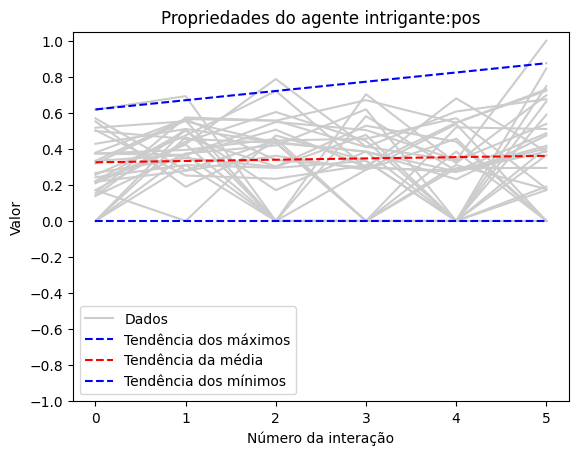

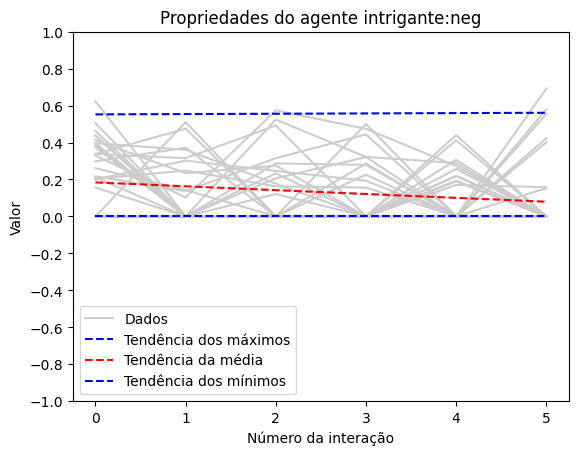

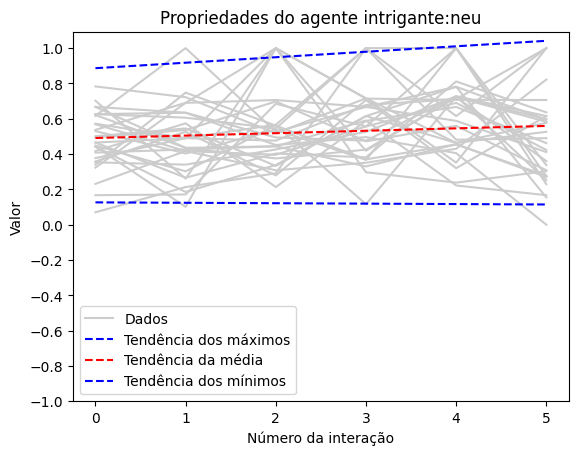

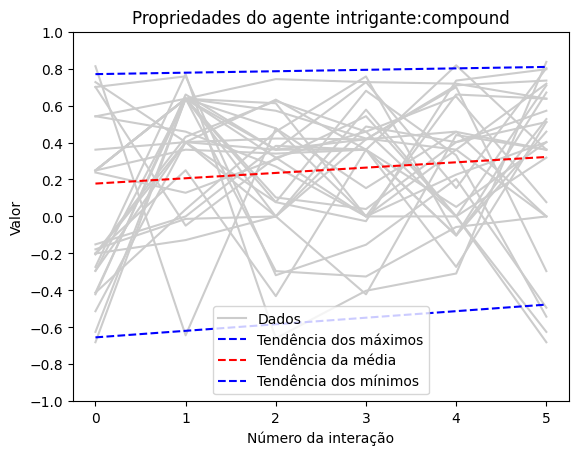

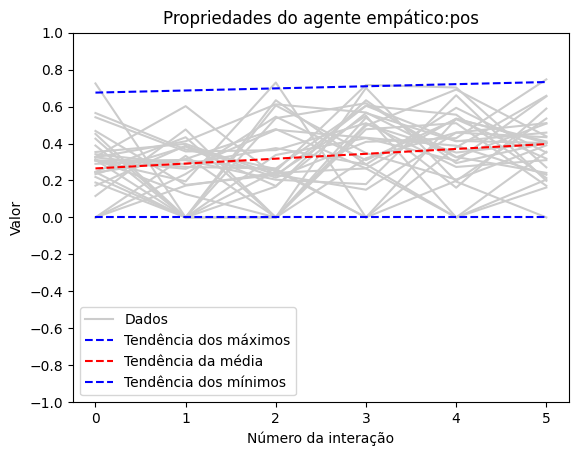

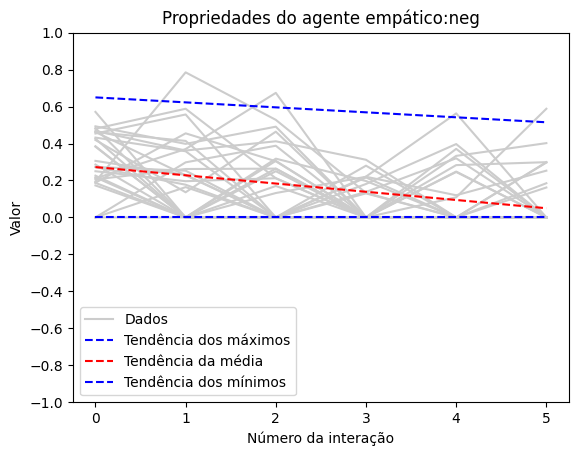

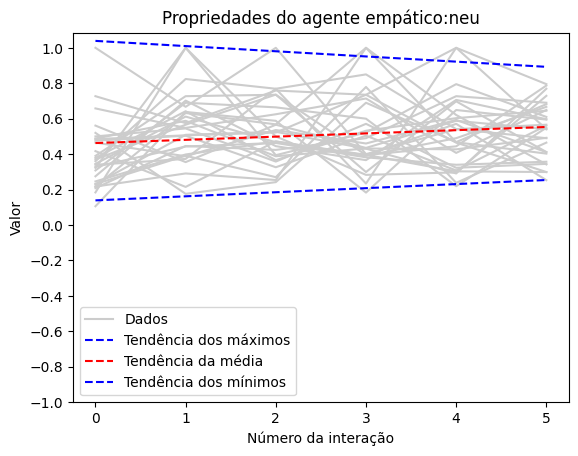

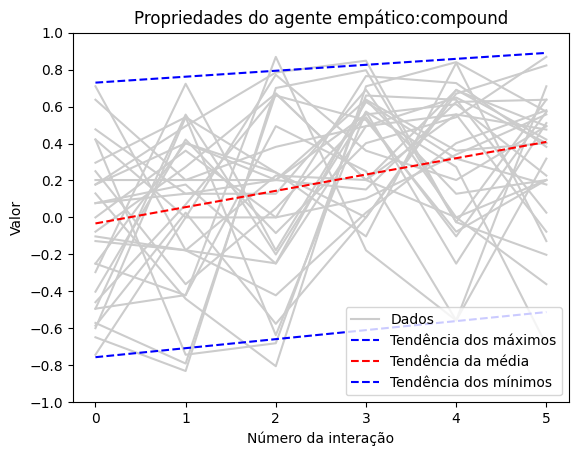

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

compare = {}

for agent in ['agente intrigante', 'agente empático']:
    for category in ['pos', 'neg', 'neu', 'compound']:

        data = np.array([[d[category] for d in x if d['agent'] == agent] for x in processed_texts])
        for x in data:
            plt.plot(range(len(x)), x, '#ccc')
        data = data.T

        # x values are just indices
        x = np.arange(len(data))

        avg_y = np.mean(data, axis=1)
        min_y = np.min(data, axis=1)
        max_y = np.max(data, axis=1)

        # calculate polynomial fit (degree = 1 for linear)
        coef_avg = np.polyfit(x, avg_y, 1)
        coef_min = np.polyfit(x, min_y, 1)
        coef_max = np.polyfit(x, max_y, 1)

        poly1d_fn_avg = np.poly1d(coef_avg)
        poly1d_fn_min = np.poly1d(coef_min) 
        poly1d_fn_max = np.poly1d(coef_max)


        legends = [Line2D([0], [0], color='#ccc', label='Dados'),
                   Line2D([0], [0], color='blue', label='Tendência dos máximos', linestyle='--'),
                   Line2D([0], [0], color='red', label='Tendência da média', linestyle='--'),
                   Line2D([0], [0], color='blue', label='Tendência dos mínimos', linestyle='--'),
        ]

        plt.plot(x, poly1d_fn_avg(x), '--r')
        plt.plot(x, poly1d_fn_min(x), '--b')
        plt.plot(x, poly1d_fn_max(x), '--b')

        plt.yticks(np.arange(-1, 1.1, 0.2))

        plt.xlabel('Número da interação')
        plt.ylabel('Valor')
        plt.title(f'Propriedades do {agent}:{category}')
        plt.legend(handles=legends)
        plt.show()

        if category == 'compound':
            compare[agent] = {
                'avg': poly1d_fn_avg(x).tolist(),
                'min': poly1d_fn_min(x).tolist(),
                'max': poly1d_fn_max(x).tolist()
            }

In [6]:
compare

{'agente intrigante': {'avg': [0.17775615763546784,
   0.2065412807881772,
   0.23532640394088655,
   0.2641115270935959,
   0.2928966502463053,
   0.32168177339901466],
  'min': [-0.6545047619047615,
   -0.6190361904761901,
   -0.5835676190476187,
   -0.5480990476190474,
   -0.512630476190476,
   -0.47716190476190457],
  'max': [0.7699999999999998,
   0.7777999999999998,
   0.7855999999999997,
   0.7933999999999997,
   0.8011999999999997,
   0.8089999999999997]},
 'agente empático': {'avg': [-0.03257110016420363,
   0.055675500821018034,
   0.1439221018062397,
   0.2321687027914614,
   0.32041530377668304,
   0.40866190476190467],
  'min': [-0.7563095238095233,
   -0.7074723809523806,
   -0.6586352380952378,
   -0.609798095238095,
   -0.5609609523809523,
   -0.5121238095238096],
  'max': [0.7293285714285709,
   0.7615171428571423,
   0.7937057142857138,
   0.8258942857142852,
   0.8580828571428568,
   0.8902714285714283]}}